#### General Steps to Follow

1. Importing Packages
2. Defining anchor, positive, and negative arrays
3. Defining data to be used in training and testing
4. Defining training and test data

## 1) Importing Packages

In [2]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np

### ----------------------------------------------------------------------------------------------------------------------------------------------------------

## 2) Defining anchor, positive, and negative arrays

#### Each of anchor, positive, and negative images will contain 500 images of shape (250, 250, 3) 

In [2]:
num_images = 500

#### Setup paths

In [3]:
lfw_path = "../data/lfw"
pos_path = "../my data/positive"
neg_path = "../my data/negative"
anc_path = "../my data/anchor"

In [4]:
negative = [] # Negative Images
anchor = []   # Anchor Images
positive = [] # Positive Images

In [5]:
#anchor
cnt = 1
for img_name in os.listdir(anc_path):
    if cnt > num_images:
        break
    cnt += 1
    path = anc_path + "/" + img_name
    image = plt.imread(path)
    anchor.append(image)
anchor = np.array(anchor)

#positive
cnt = 1
for img_name in os.listdir(pos_path):
    if cnt > num_images:
        break
    cnt += 1
    path = pos_path + "/" + img_name
    image = plt.imread(path)
    positive.append(image)
positive = np.array(positive)

#negative
cnt = 1
for img_name in os.listdir(neg_path):
    if cnt > num_images:
        break
    cnt += 1
    path = neg_path + "/" + img_name
    image = plt.imread(path)
    negative.append(image)

In [6]:
anchor = np.array(anchor)
positive = np.array(positive)
negative = np.array(negative)
print("Anchor examples array shape   :", anchor.shape)
print("Poitive examples array shape  :", positive.shape)
print("Negative examples array shape :", negative.shape)

Anchor examples array shape   : (500, 250, 250, 3)
Poitive examples array shape  : (500, 250, 250, 3)
Negative examples array shape : (500, 250, 250, 3)


#### Visualizing positive, anchor and negative images

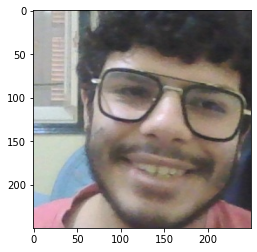

In [172]:
plt.imshow(anchor[10])

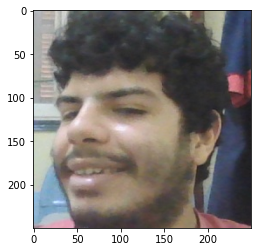

In [8]:
plt.imshow(positive[10])

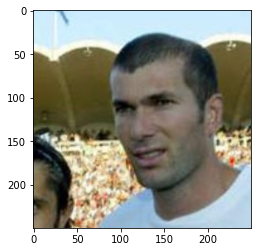

In [9]:
plt.imshow(negative[10])

#### Saving positive, anchor and negative arrays into "my data" folder

In [10]:
np.save("../my data/anchor_array.npy", anchor)
np.save("../my data/positive_array.npy", positive)
np.save("../my data/negative_array.npy", negative)

### ----------------------------------------------------------------------------------------------------------------------------------------------------------

## 3) Defining data to be used in training and testing

### 3.1) Normalizing anchor, positive, and negative images

#### The range of pixels will be from zero to one

In [9]:
anchor_norm = anchor / [255]
positive_norm = positive / [255]
negative_norm = negative / [255]

### --------------------------------------------------------------------------------

### 3.2) Creating the triples

1. I will compine each anchor image with its corresponding positive image and a label of 1 (They are similar images) and then store the results into "positive_data".
2. I will compine each anchor image with its corresponding negative image and a label of 0 (They are different images) and then store the results into "negative_data".
3. I will combine "positive_data" and "negative_data" into "data".

#### 1. Creating "positive_data"

In [15]:
positive_data = []
for i in range(num_images):
    positive_data.append([anchor_norm[i],positive_norm[i],1])
positive_data = np.array(positive_data, dtype = object)

##### Visualizing the first example of "positive_data" 


Label = 1


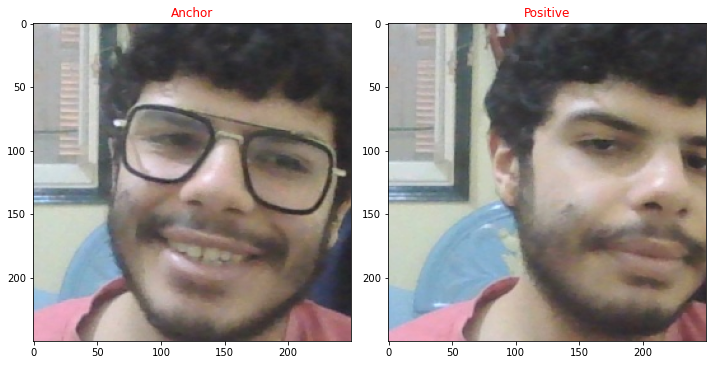

In [147]:
anc = positive_data[0][0]
pos = positive_data[0][1]
label = positive_data[0][2]

print("\nLabel =", label)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# Plot the first image on the first subplot
axes[0].imshow(anc)
axes[0].set_title('Anchor', color = 'r')

# Plot the second image on the second subplot
axes[1].imshow(pos)
axes[1].set_title('Positive', color = 'r')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure with both images
plt.show()

#### 2. Creating "negative_data"

In [16]:
negative_data = []
for i in range(num_images):
    negative_data.append([anchor_norm[i],negative_norm[i],0])
negative_data = np.array(negative_data, dtype = object)

##### Visualizing the first example of "negative_data" 


Label = 0


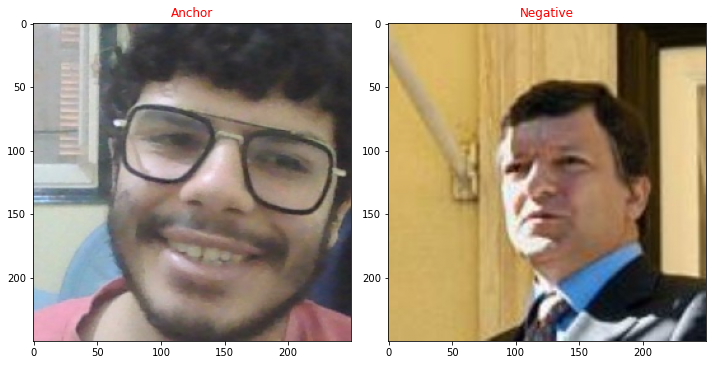

In [149]:
anc = negative_data[0][0]
neg = negative_data[0][1]
label = negative_data[0][2]

print("\nLabel =", label)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# Plot the first image on the first subplot
axes[0].imshow(anc)
axes[0].set_title('Anchor', color = 'r')

# Plot the second image on the second subplot
axes[1].imshow(neg)
axes[1].set_title('Negative', color = 'r')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure with both images
plt.show()

#### 3. Combining "positive_data" and "negative_data" into "data"

In [17]:
data = np.concatenate((positive_data, negative_data), axis = 0)

##### data contains 500 positive examples and 500 negative examples. I will shuffle the elements to randomize their order

In [151]:
np.random.shuffle(data)

### ----------------------------------------------------------------------------------------------------------------------------------------------------------

## 4) Resizing the images to match the input size in the paper

* My images are of size (250, 250, 3) and the input size to the siamese network is (105, 105, 3) in the research paper
* So, I will resize the all images below and save the results in "data_resized"

In [152]:
data_resized = data.copy()
len(data_resized)

1000

In [153]:
for i in range(1000):
    img = data_resized[i,0]
    img = tf.image.resize(img,(105,105))
    img = img.numpy()
    data_resized[i,0] = img

    img = data_resized[i,1]
    img = tf.image.resize(img,(105,105))
    img = img.numpy()
    data_resized[i,1] = img

In [154]:
data_resized[0,0].shape

(105, 105, 3)

In [156]:
np.save("../my data/data.npy", data_resized)

##### Saving "data"  array into "my data" folder 

### ----------------------------------------------------------------------------------------------------------------------------------------------------------

## 5) Defining training and test data

##### Splitting the data: 80% training data, 20% test data 

In [157]:
len(data_resized)

1000

In [158]:
train_data = data_resized[:800]
test_data = data_resized[800:]

In [159]:
len(train_data)

800

In [160]:
len(test_data)

200

##### Saving "train_data" and "test_data" arrays into "my data" folder 

In [161]:
np.save("../my data/train_data.npy", train_data)
np.save("../my data/test_data.npy", test_data)

##### Checking the labels in train and test data

In [162]:
one_train = 0
zero_train = 0
one_test = 0
zero_test = 0

for x in train_data:
    if x[2] == 1:
        one_train += 1
    else:
        zero_train += 1

for x in test_data:
    if x[2] == 1:
        one_test += 1
    else:
        zero_test += 1
        
print("Number of 'label = 1' in train data =", one_train)
print("Number of 'label = 0' in train data =", zero_train)
print("Number of 'label = 1' in test data  =", one_test)
print("Number of 'label = 0' in test data  =", zero_test)

Number of 'label = 1' in train data = 405
Number of 'label = 0' in train data = 395
Number of 'label = 1' in test data  = 95
Number of 'label = 0' in test data  = 105
